In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

## Voltaje de rizado
### Variando resistencia

In [3]:
vr_res = np.array([[512, 130.2, 228, 2696, 6700],[5.1, 6.8, 5.9, 1.9, 1.1]])

En teoría esta vaina debería dar de la forma $\frac{a}{x}$ pero ???

Por otro lado, para sacar el factor de rizado necesitamos $V_P$ pero con la señal filtrada cómo se saca? Con el centro que estaba re abajo?

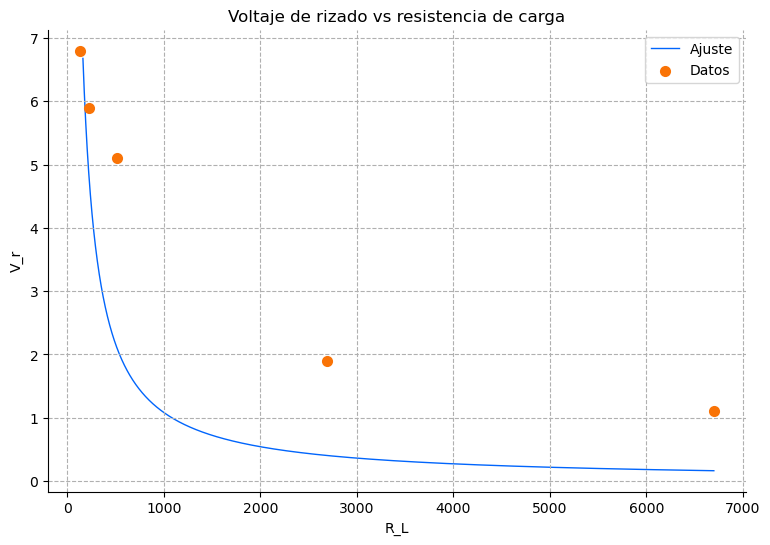

In [47]:
def fun(x,a): return a/x
expfit, _ = curve_fit(fun, vr_res[0], vr_res[1], method='dogbox')
x = range(int(vr_res[0][0]-350),int(vr_res[0][-1]))


fig, (ax1) = plt.subplots(1, 1, figsize=(9,6))

ax1.scatter(vr_res[0], vr_res[1], marker='o', color='xkcd:orange', linewidth=2, zorder=2, label='Datos')
ax1.plot(x, fun(x,expfit[0]), color='xkcd:bright blue', linewidth=1, zorder=1, label='Ajuste')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(ls='--', zorder=0)
ax1.set_title("Voltaje de rizado vs resistencia de carga")
ax1.set_ylabel("V_r")
ax1.set_xlabel("R_L")
ax1.legend(loc='upper right')

### Variando capacitancia

In [29]:
vr_cap = np.array([[2.2, 10, 100, 1000],[3.2, 2.04, 2.58, 1.49]])

Este sí es que definitivamente no veo el modo en que esté bien.

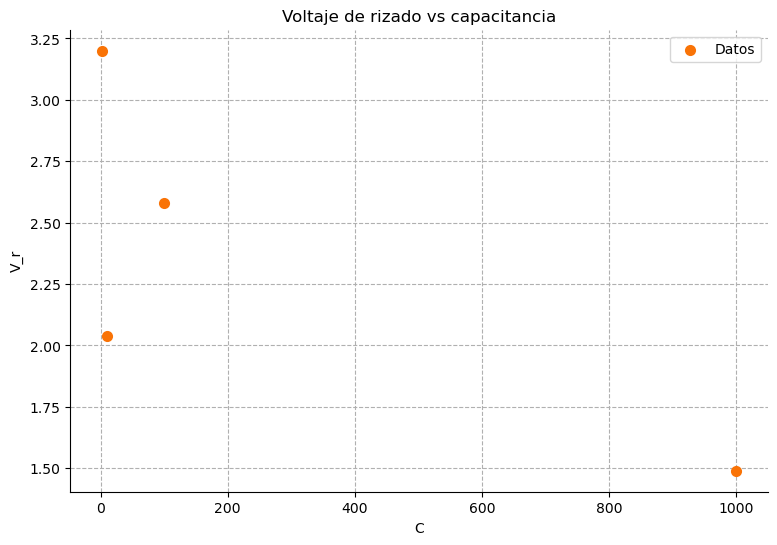

In [52]:
def fun2(x,a): return (a - a/x)
capfit, _ = curve_fit(fun, vr_cap[0], vr_cap[1])
x = range(int(vr_cap[0][0]),int(vr_cap[0][-1]))


fig, (ax1) = plt.subplots(1, 1, figsize=(9,6))

ax1.scatter(vr_cap[0], vr_cap[1], marker='o', color='xkcd:orange', linewidth=2, zorder=2, label='Datos')
#ax1.plot(x, fun2(x,capfit[0]), color='xkcd:bright blue', linewidth=1, zorder=1, label='Ajuste')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(ls='--', zorder=0)
ax1.set_title("Voltaje de rizado vs capacitancia")
ax1.set_ylabel("V_r")
ax1.set_xlabel("C")
ax1.legend(loc='upper right')